In [1]:
#These packages are used throughout code
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#mount drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#I think this may be where your file is located
shared_drive_file = '/content/drive/Shared with me/IDS_575_Group5/FinalProject/Base.csv'

#This is where my file is located
drive_file = '/content/drive/MyDrive/IDS_575_Group5/FinalProject/Base.csv'

data = pd.read_csv(drive_file)

In [4]:
print("Fraduelent Accounts:", (data['fraud_bool'] == 1).sum())
print("Regular Accounts:", (data['fraud_bool'] == 0).sum())

Fraduelent Accounts: 11029
Regular Accounts: 988971


In [5]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [6]:
print(data["fraud_bool"].value_counts()) #1% of accounts are fraudulent

0    988971
1     11029
Name: fraud_bool, dtype: int64


In [7]:
data.tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
999995,0,0.6,0.192631,-1,104,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4
999996,0,0.8,0.322989,148,9,50,1.628119,-1.409803,AC,3306,...,0,200.0,0,INTERNET,8.967865,windows,0,1,0,4
999997,0,0.8,0.879403,-1,30,20,0.018563,34.692760,AA,1522,...,0,200.0,0,INTERNET,8.195531,other,0,1,0,4
999998,0,0.9,0.762112,-1,189,20,0.015352,94.661055,AA,1418,...,0,500.0,0,INTERNET,4.336064,windows,1,1,0,4
999999,0,0.2,0.697452,-1,321,20,2.655916,9.908499,AA,951,...,0,200.0,0,INTERNET,6.717022,linux,0,1,0,4


In [8]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [9]:
print("Rows:", data.shape[0], "\nColumns:", data.shape[1])

Rows: 1000000 
Columns: 32


In [10]:
#There are actually null values, but they are encoded with -1 instead of nan
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

# Data Dictionary

## Table Name: [Data]

| Column Name | Data Type | Description |
|-------------|-----------|-------------|
| `fraud_bool`   | int64  | Fraud label (1 if fraud, 0 if legit) |
| `income`   | float64  | Annual income of the applicant in quantiles. Ranges between [0, 1].|
| `name_email_similarity`   | float64  | Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1]. |
| `prev_address_months_count`   | int64  | Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value). |
| `current_address_months_count`   | int64  | Months in currently registered address of the applicant. Ranges between [−1, 406] months (-1 is a missing value). |
| `customer_age`   | int64  | Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). |
| `days_since_request`   | float64  | Number of days passed since application was done. Ranges between [0, 78] days. |
| `intended_balcon_amount`   | float64  | Initial transferred amount for application. Ranges between [−1, 108]. |
| `payment_type`   | object  | Credit payment plan type. 5 possible (annonymized) values. |
| `zip_count_4w`   | int64  | Number of applications within same zip code in last 4 weeks. Ranges between [1, 5767]. |
| `velocity_6h`   | float64  | Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−211, 24763]. |
| `velocity_24h`   | float64  | Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1329, 9527]. |
| `velocity_4w`   | float64  | Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2779, 7043]. |
| `bank_branch_count_8w`   | int64  | Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2521]. |
| `date_of_birth_distinct_emails_4w`   | int64  | Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 42]. |
| `employment_status`   | object  | Employment status of the applicant. 7 possible (annonymized) values. |
| `credit_risk_score`   | int64  | Internal score of application risk. Ranges between [−176, 387]. |
| `email_is_free`   | int64  | Domain of application email (either free or paid). |
| `housing_status`   | object  | Current residential status for applicant. 7 possible (annonymized) values. |
| `phone_home_valid`   | int64  | Validity of provided home phone. |
| `phone_mobile_valid`   | int64  | Validity of provided mobile phone. |
| `bank_months_count`   | int64  | How old is previous account (if held) in months. Ranges between [−1, 31] months (-1 is a missing value). |
| `has_other_cards`   | int64  | If applicant has other cards from the same banking company. |
| `proposed_credit_limit`   | float64  | Applicant’s proposed credit limit. Ranges between [200, 2000]. |
| `foreign_request`   | int64  | If origin country of request is different from bank’s country. |
| `source`   | object  | Online source of application. Either browser(INTERNET) or mobile app (APP). |
| `session_length_in_minutes`   | float64  | Length of user session in banking website in minutes. Ranges between [−1, 107] minutes |
| `device_os`   | object  | Operative system of device that made request. Possible values are: Windows, Macintox, Linux, X11, or other. |
| `keep_alive_session`   | int64  | User option on session logout. |
| `device_distinct_emails_8w`   | int64  | Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3]. |
| `device_fraud_count`   | int64  | Number of fraudulent applications with used device. Ranges between [0, 1]. |
| `month`   | int64  | Month where the application was made. Ranges between [0, 7]. |


## Data Pre-processing

In [11]:
#Creation of dummy columns
categorical_cols = ["payment_type", "employment_status", "housing_status", "source", "device_os"]

data = pd.get_dummies(data, columns=categorical_cols)
len(data.columns)

53

In [ ]:
#nulls are encoded in some columns as -1
missing_val_cols = ["prev_address_months_count", "current_address_months_count", "bank_months_count"]

#There are a lot of missiing values here. Not sure what to do.
for col in missing_val_cols:
    print(data[col].value_counts().sort_index())


-1      712920
 5           1
 6          53
 7         409
 8        1962
         ...  
 374         1
 375         1
 377         3
 381         1
 383         1
Name: prev_address_months_count, Length: 374, dtype: int64
-1       4254
 0       9609
 1      11297
 2      12741
 3      13986
        ...  
 418        2
 419        1
 424        1
 425        2
 428        1
Name: current_address_months_count, Length: 423, dtype: int64
-1     253635
 1     194802
 2      25836
 3       8580
 4       3834
 5      28001
 6      17678
 7        931
 8         30
 9       4801
 10     37158
 11     23745
 12      1121
 13         2
 14       493
 15     59141
 16      4563
 17         4
 18       491
 19      8212
 20     30850
 21     29098
 22      6741
 23       320
 24      1822
 25     40450
 26     24779
 27      4197
 28     80082
 29     11696
 30     50777
 31     46084
 32        46
Name: bank_months_count, dtype: int64


## Handling Nulls

In [ ]:
#Opted for imputation of the mean of columns. KNN Imputer proved to be too computationally intensive

#create copy of data
noNulls = data.copy()
print("Records before removing nulls:", noNulls.shape[0])

#replace missing values encoded as -1 with nan
noNulls[missing_val_cols] = noNulls[missing_val_cols].replace(-1, np.nan)
print("Records after removing nulls:", noNulls.shape[0])


print("Nulls before imputation:", noNulls.isnull().any(axis=1).sum())

#imputing values with mean
noNulls = noNulls.fillna(noNulls.mean())

print("Nulls after imputation:", noNulls.isnull().any(axis=1).sum())

print("Records after inputation:", noNulls.shape[0])

Records before removing nulls: 1000000
Records after removing nulls: 1000000
Nulls before imputation: 804878
Nulls after imputation: 0
Records after inputation: 1000000


In [ ]:
noNulls.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1,0.9,0.166828,60.719967,88.0,50,0.020925,-1.331345,769,10650.765523,...,0,0,0,1,0,0,0,0,1,0
1,1,0.9,0.296286,60.719967,144.0,50,0.005418,-0.816224,366,534.047319,...,0,0,0,1,0,0,0,0,1,0
2,1,0.9,0.044985,60.719967,132.0,40,3.108549,-0.755728,870,4048.534263,...,0,0,0,1,0,0,0,1,0,0
3,1,0.9,0.159511,60.719967,22.0,50,0.019079,-1.205124,810,3457.064063,...,0,0,0,1,0,1,0,0,0,0
4,1,0.9,0.596414,60.719967,218.0,50,0.004441,-0.773276,890,5020.341679,...,0,0,0,1,0,0,1,0,0,0


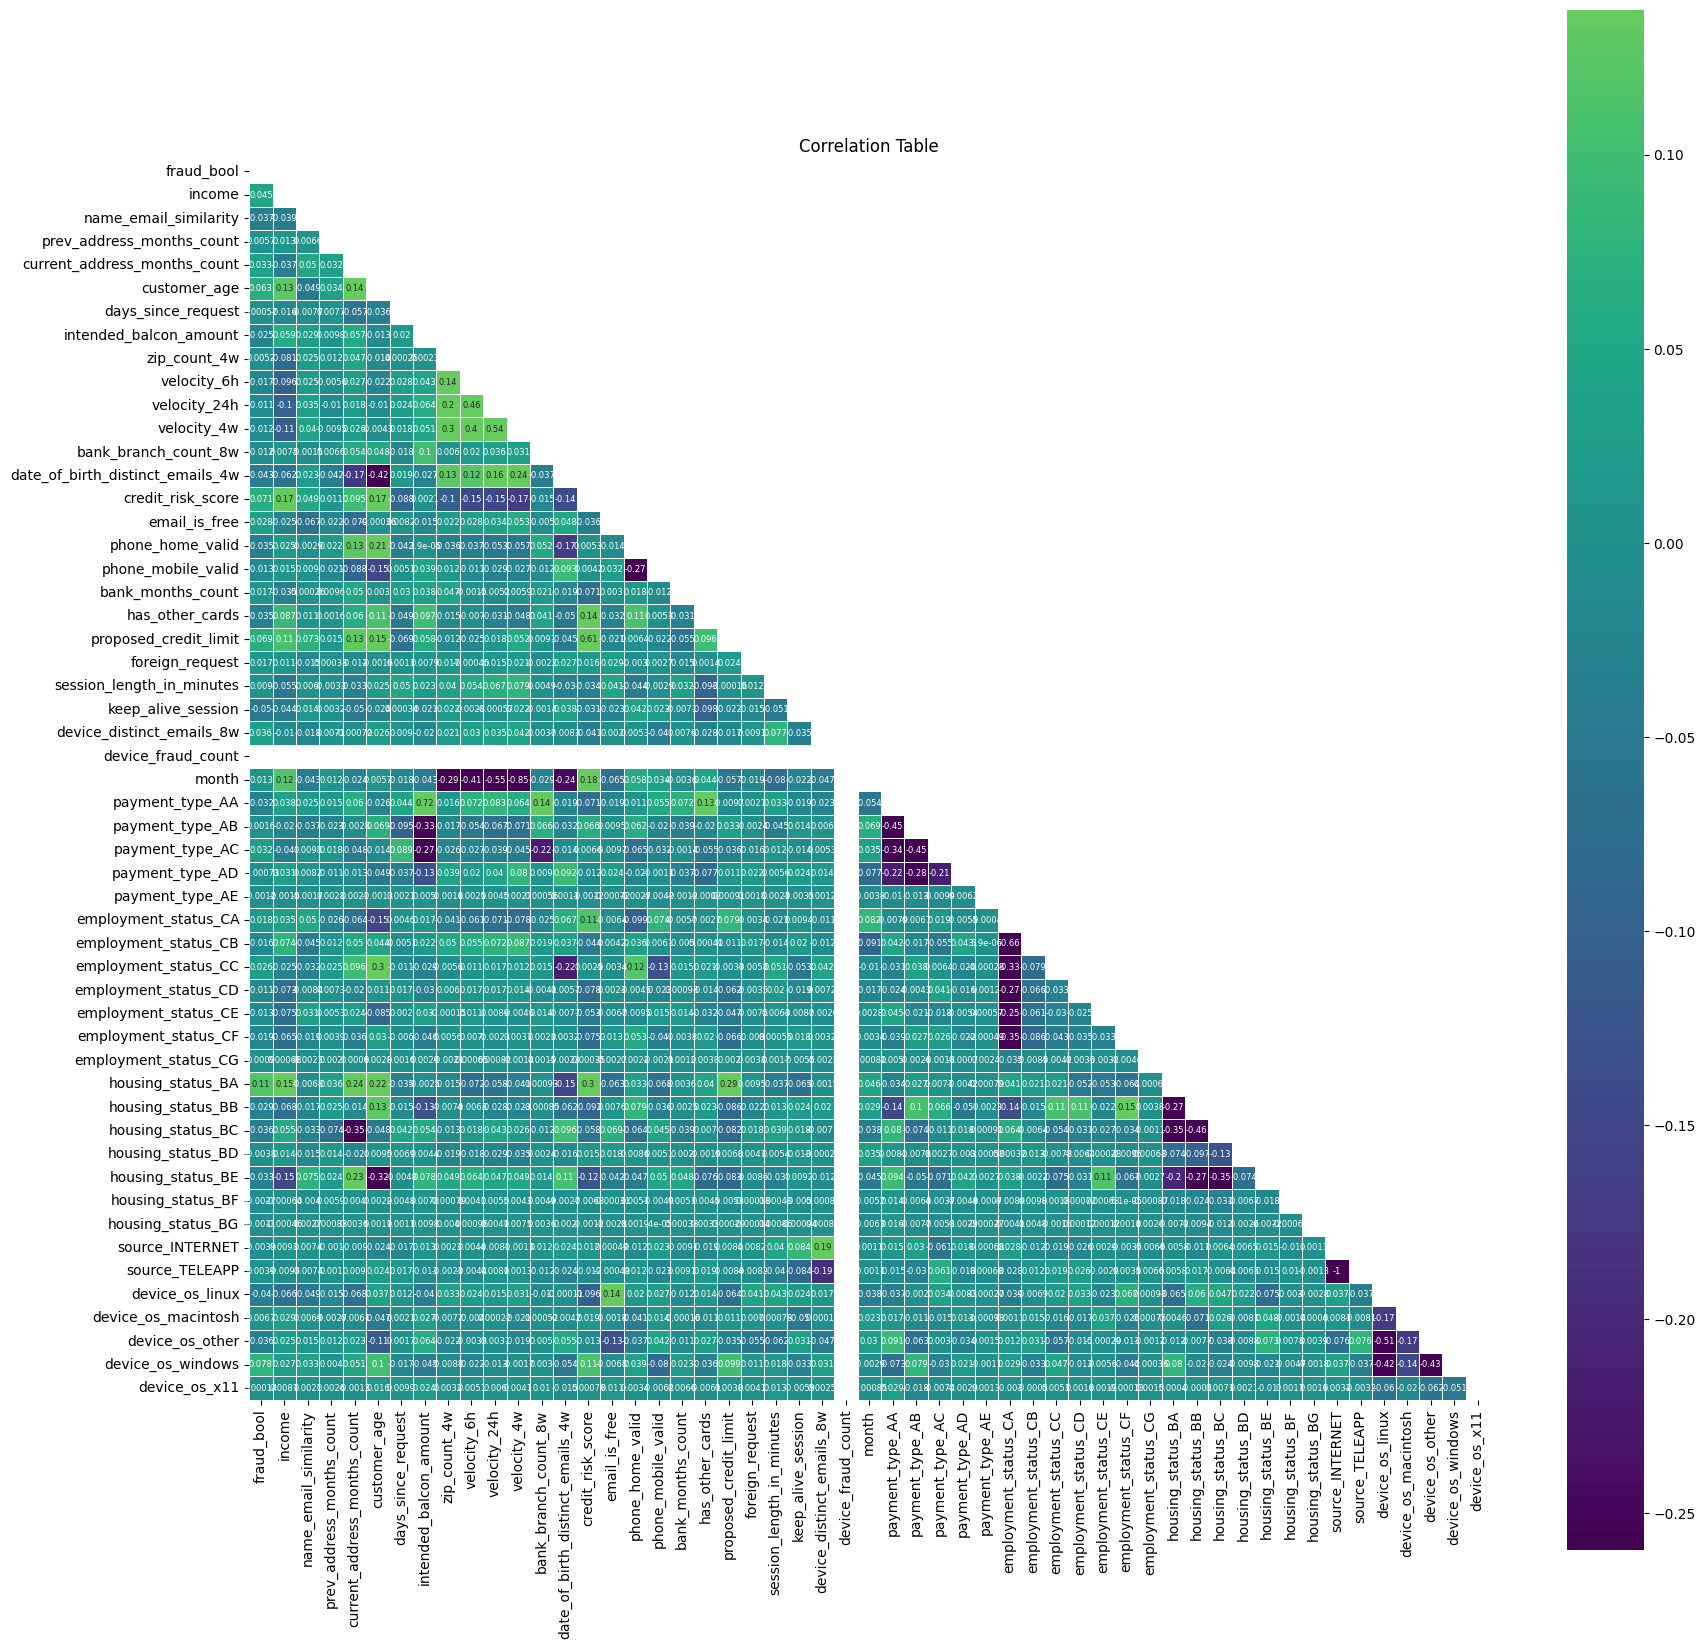

In [ ]:
plt.figure(figsize = (20,20))
corr = noNulls.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6, annot=True, annot_kws={'size': 6})
plt.title('Correlation Table')
plt.show()

<ipython-input-30-8a1603da3c7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d = data.corr()['fraud_bool'][1:].abs().sort_values().plot(kind='bar', title='Highly correlated features with fraud_bool')


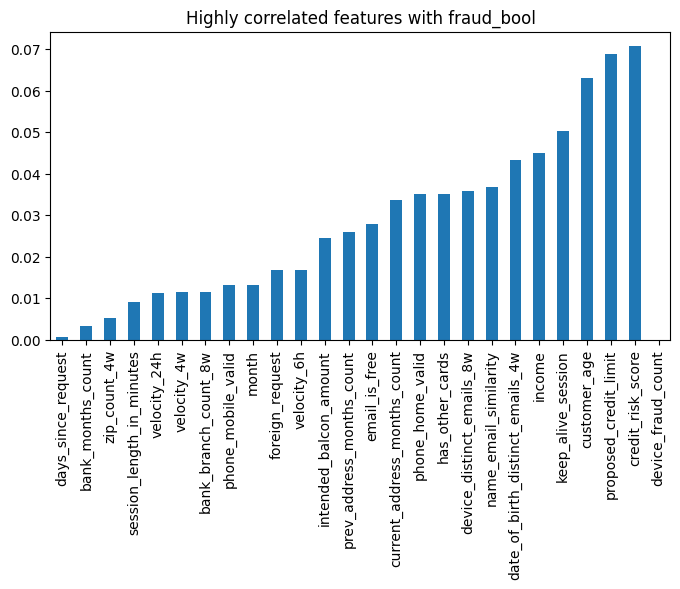

In [ ]:
plt.figure(figsize=(17,4))
d = data.corr()['fraud_bool'][1:].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

<Axes: >

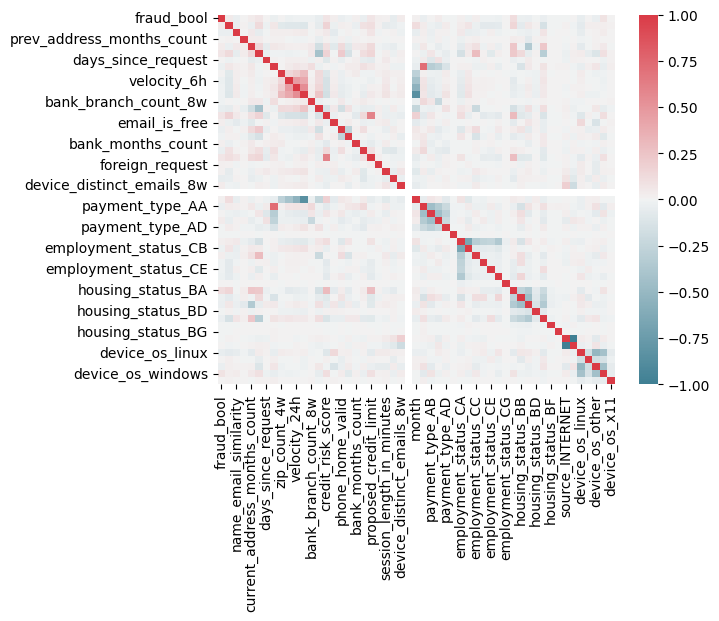

In [ ]:
sns.heatmap(noNulls.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
noNulls.corr()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
fraud_bool,1.000000,0.045079,-0.036720,0.005744,0.033458,0.062959,0.000567,-0.024524,0.005212,-0.016892,...,-0.032781,-0.002676,-0.001073,-0.003922,0.003922,-0.039717,0.006719,-0.036433,0.078263,0.000145
income,0.045079,1.000000,-0.038519,0.013157,-0.036769,0.125822,-0.015877,0.059046,-0.080581,-0.096431,...,-0.146315,-0.000636,-0.000456,0.009337,-0.009337,-0.065704,0.028630,0.024620,0.027418,0.008658
name_email_similarity,-0.036720,-0.038519,1.000000,0.006631,0.049933,-0.048902,-0.007736,0.029040,0.025114,0.024881,...,0.075409,-0.004022,0.002737,0.007437,-0.007437,-0.049451,0.006890,0.014822,0.032992,0.002089
prev_address_months_count,0.005744,0.013157,0.006631,1.000000,0.031679,0.034227,0.007697,0.009777,0.011794,-0.005550,...,0.024238,0.005857,0.000828,-0.001016,0.001016,-0.015228,-0.002735,0.012211,0.004028,0.002628
current_address_months_count,0.033458,-0.036769,0.049933,0.031679,1.000000,0.141952,-0.057111,0.056624,0.046544,0.026785,...,0.231852,0.004028,0.003563,-0.009002,0.009002,-0.067553,-0.006058,0.023184,0.050619,-0.001250
customer_age,0.062959,0.125822,-0.048902,0.034227,0.141952,1.000000,-0.035999,-0.013000,-0.014176,-0.022063,...,-0.316647,0.002226,0.001102,-0.024412,0.024412,0.036512,-0.047425,-0.109712,0.100447,0.015584
days_since_request,0.000567,-0.015877,-0.007736,0.007697,-0.057111,-0.035999,1.000000,0.019782,0.000249,0.027968,...,-0.004808,0.004789,0.001104,-0.016786,0.016786,0.011792,0.002119,0.001655,-0.017384,0.009900
intended_balcon_amount,-0.024524,0.059046,0.029040,0.009777,0.056624,-0.013000,0.019782,1.000000,0.002251,0.042849,...,0.078405,0.007787,0.009797,0.013183,-0.013183,-0.040352,0.027498,0.064001,-0.044548,0.024272
zip_count_4w,0.005212,-0.080581,0.025114,0.011794,0.046544,-0.014176,0.000249,0.002251,1.000000,0.142372,...,0.049419,-0.000788,0.004008,0.002298,-0.002298,0.032805,-0.007210,-0.021521,-0.008823,0.003198
velocity_6h,-0.016892,-0.096431,0.024881,-0.005550,0.026785,-0.022063,0.027968,0.042849,0.142372,1.000000,...,0.063811,0.004094,0.000957,0.004441,-0.004441,0.024391,-0.003971,-0.003266,-0.021516,0.005102


IndexError: ignored

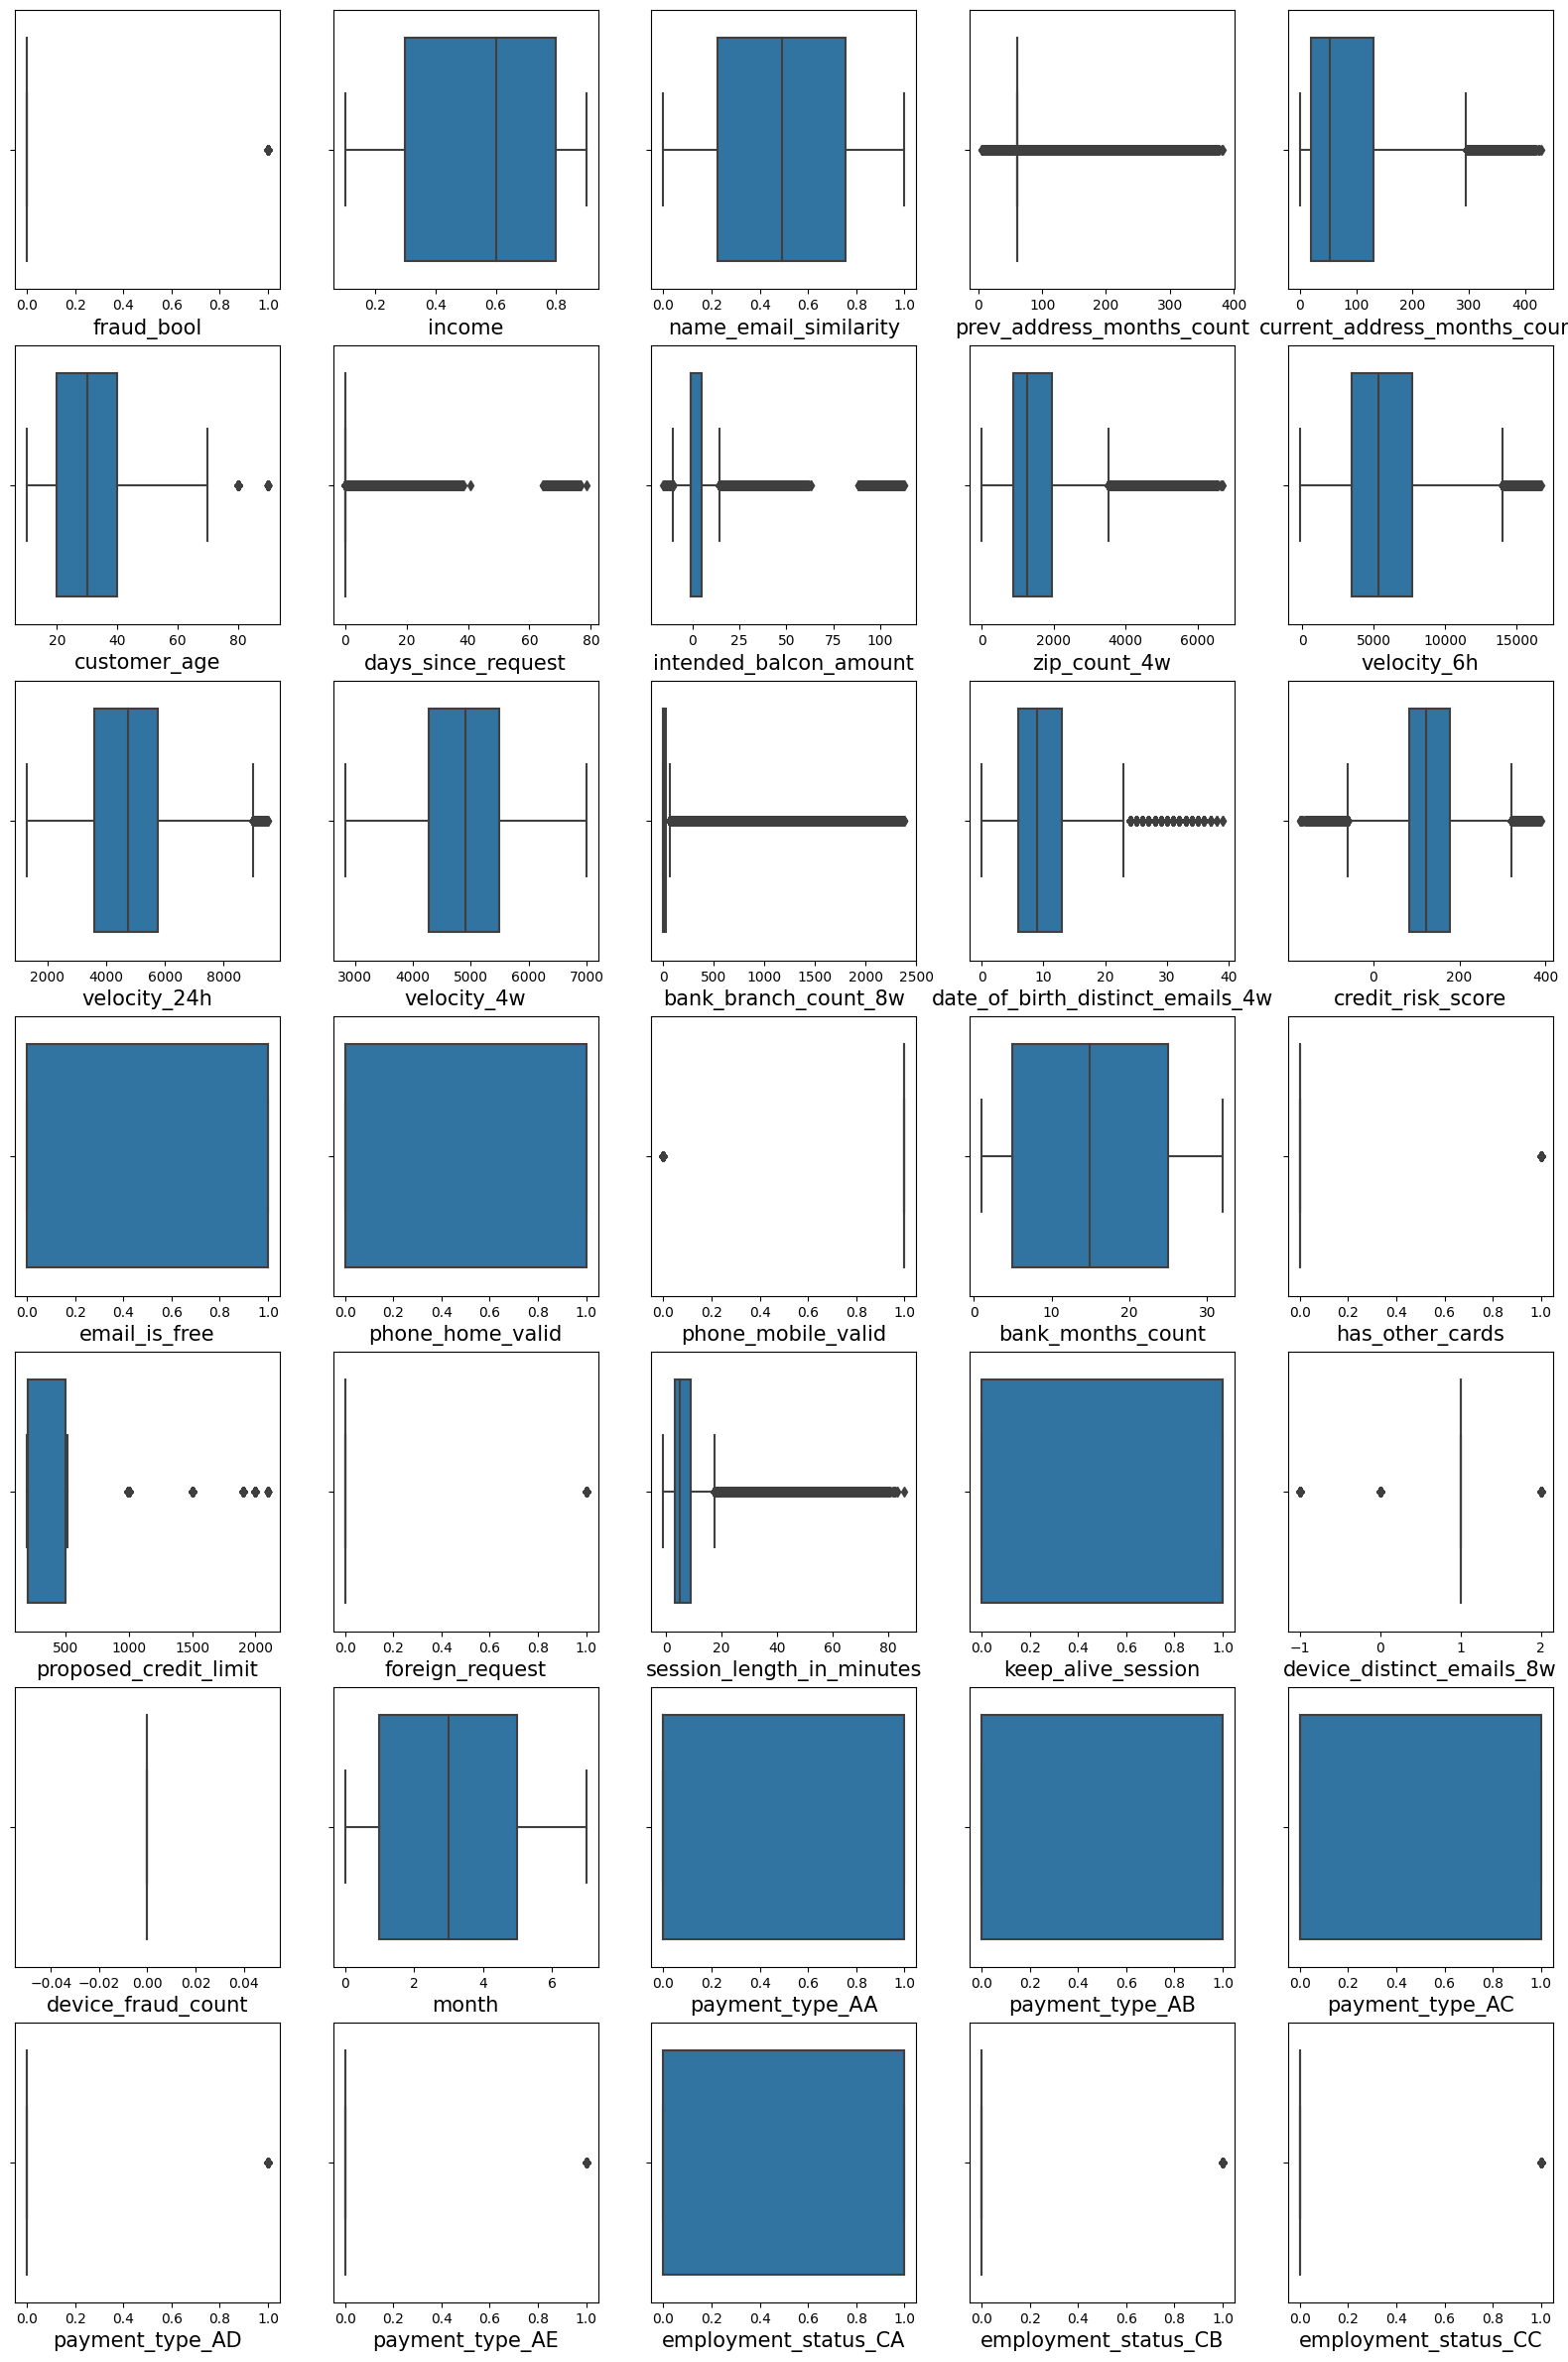

In [ ]:
import matplotlib.pyplot as plt


############# Box Plot

col_name = list(noNulls.columns)
# f_box, axe_box = plt.subplots(round(len(col_name)/5), 4)
f_box, axe_box = plt.subplots(nrows=7, ncols=5, figsize=(20,30))
y = 0
for name in col_name:
    i, j = divmod(y, 5)
    bx_plot = sns.boxplot(x=noNulls[name], ax=axe_box[i, j])
    bx_plot.set_xlabel(name, fontsize=15)
    y = y + 1

plt.tight_layout()
plt.show()

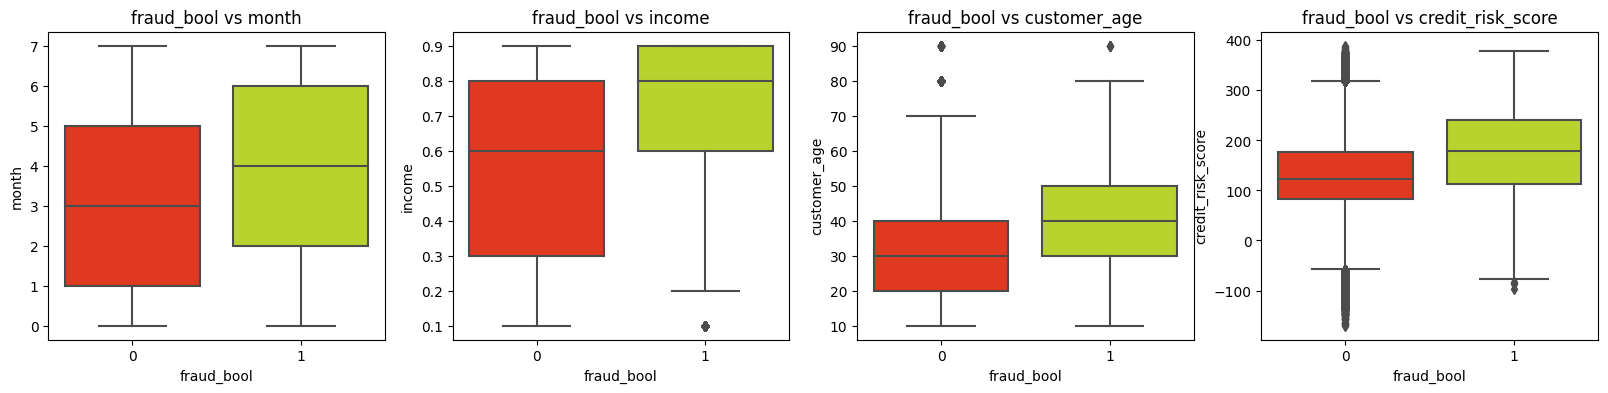

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ['#ff2200', '#ccee12']
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="fraud_bool", y="month", data=noNulls, palette=colors, ax=axes[0])
axes[0].set_title('fraud_bool vs month')

sns.boxplot(x="fraud_bool", y="income", data=noNulls, palette=colors, ax=axes[1])
axes[1].set_title('fraud_bool vs income')


sns.boxplot(x="fraud_bool", y="customer_age", data=noNulls, palette=colors, ax=axes[2])
axes[2].set_title('fraud_bool vs customer_age')


sns.boxplot(x="fraud_bool", y="credit_risk_score", data=noNulls, palette=colors, ax=axes[3])
axes[3].set_title('fraud_bool vs credit_risk_score')

plt.show()

## Scaling

In [ ]:
#splitting features and target
y = np.array(noNulls["fraud_bool"])
X = noNulls.loc[: , noNulls.columns != 'fraud_bool']


In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.9,0.166828,60.719967,88.0,50,0.020925,-1.331345,769,10650.765523,3134.319630,...,0,0,0,1,0,0,0,0,1,0
1,0.9,0.296286,60.719967,144.0,50,0.005418,-0.816224,366,534.047319,2670.918292,...,0,0,0,1,0,0,0,0,1,0
2,0.9,0.044985,60.719967,132.0,40,3.108549,-0.755728,870,4048.534263,2893.621498,...,0,0,0,1,0,0,0,1,0,0
3,0.9,0.159511,60.719967,22.0,50,0.019079,-1.205124,810,3457.064063,4054.908412,...,0,0,0,1,0,1,0,0,0,0
4,0.9,0.596414,60.719967,218.0,50,0.004441,-0.773276,890,5020.341679,2728.237159,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#This scaled data will be used for models that are easier to fit
X_scaled

array([[ 1.16174673e+00, -1.13053783e+00,  4.17168348e-16, ...,
        -7.22108118e-01,  1.67181937e+00, -8.53265747e-02],
       [ 1.16174673e+00, -6.82778469e-01,  4.17168348e-16, ...,
        -7.22108118e-01,  1.67181937e+00, -8.53265747e-02],
       [ 1.16174673e+00, -1.55195553e+00,  4.17168348e-16, ...,
         1.38483417e+00, -5.98150745e-01, -8.53265747e-02],
       ...,
       [ 8.17325869e-01,  1.33405790e+00,  4.17168348e-16, ...,
         1.38483417e+00, -5.98150745e-01, -8.53265747e-02],
       [ 1.16174673e+00,  9.28381760e-01,  4.17168348e-16, ...,
        -7.22108118e-01,  1.67181937e+00, -8.53265747e-02],
       [-1.24919932e+00,  7.04742161e-01,  4.17168348e-16, ...,
        -7.22108118e-01, -5.98150745e-01, -8.53265747e-02]])

In [ ]:
#A LOT of issues with training SVM models due to size of data
#Created a sample of data that reflects the true distribution of data as strategy

# Set the weights for sampling based on the distribution
weights = np.where(noNulls['fraud_bool'] == 1, 8, 8)

# Sample 100,000 records with the same distribution
sampled_df = noNulls.sample(n=100000, weights=weights, replace=True, random_state=42)

sample_y = np.array(sampled_df["fraud_bool"])
sample_X_reg = sampled_df.loc[: , sampled_df.columns != 'fraud_bool']

In [ ]:
print(sampled_df["fraud_bool"].value_counts())

0    98952
1     1048
Name: fraud_bool, dtype: int64


In [ ]:
#This is teh scaling of the smaller dataset
sample_X = scaler.fit_transform(sample_X_reg)

In [ ]:
len(sample_y)

100000

In [ ]:
len(sample_X)

100000

## PCA

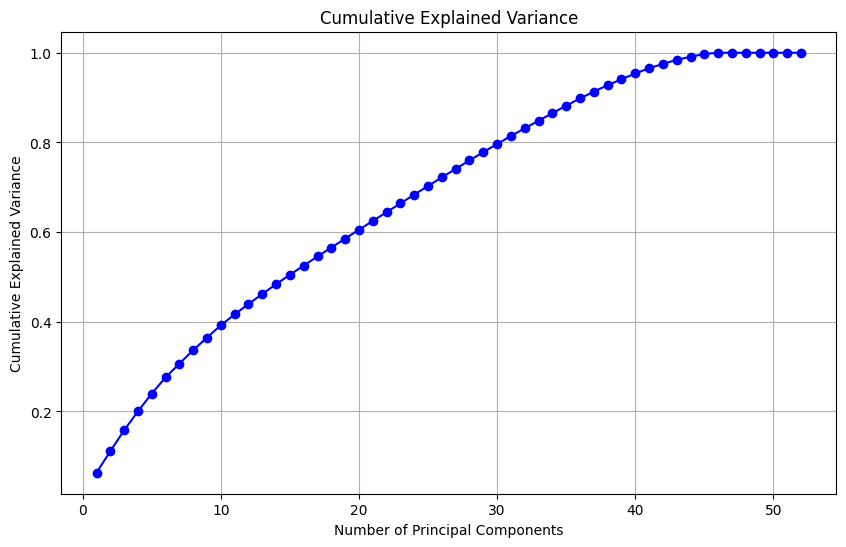

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#PCA was investigated to see how much dimensionality of the data we can reduce
#This is attractive, since it would reduce computational resources

np.random.seed(51)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Plot explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#We should use around 40 components for 95% variation explained. 30 for 80% variance. Not too much improvement from base data

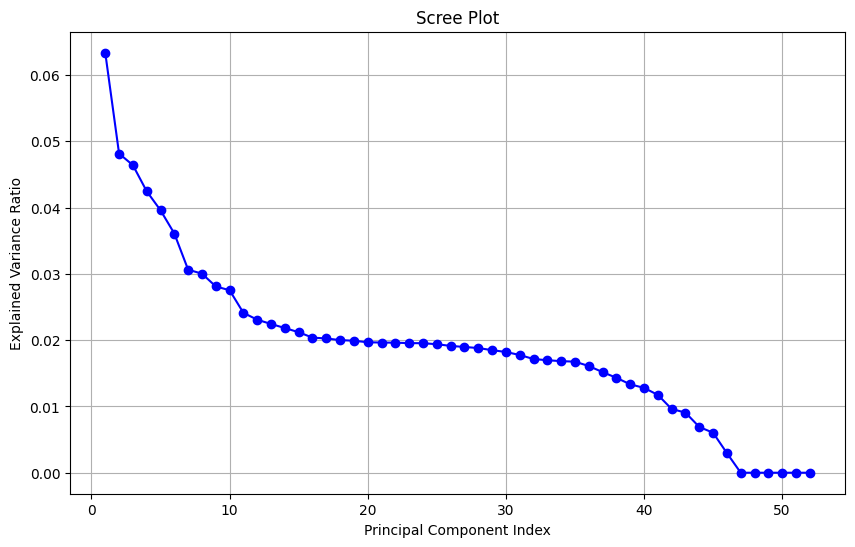

In [ ]:
# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
optimal_pca = PCA(n_components=30)
X_pca = optimal_pca.fit_transform(X_scaled)

## Logistic Regression V2

In [ ]:
# Assuming X_train, X_test, y_train, y_test are your feature and target datasets
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.2, random_state=51)

# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate models for all combinations of penalty and C
for penalty in param_grid['penalty']:
    solver_value = 'liblinear'
    if (penalty == 'elasticnet'):
      solver_value = 'saga'
    for C_value in param_grid['C']:
        print("currently on", penalty, C_value)
        model = LogisticRegression(penalty=penalty, C=C_value, solver=solver_value)
        if (penalty == 'elasticnet'):
          model = LogisticRegression(penalty=penalty, C=C_value, solver=solver_value, l1_ratio=0.5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Add results to the DataFrame
        results_df = results_df.append({
            'Model': f"{penalty} (C={C_value})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }, ignore_index=True)

# Print the results table
print(results_df)


currently on l1 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 0.1


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 1


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 10


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 100


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l1 1000


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 0.1


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 1


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 10


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 100


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on l2 1000


<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 100


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


currently on elasticnet 1000
                   Model  Accuracy  Precision    Recall  F1 Score
0           l1 (C=0.001)   0.98980   0.000000  0.000000  0.000000
1            l1 (C=0.01)   0.98980   0.000000  0.000000  0.000000
2             l1 (C=0.1)   0.98985   0.600000  0.014706  0.028708
3               l1 (C=1)   0.98995   0.714286  0.024510  0.047393
4              l1 (C=10)   0.98995   0.714286  0.024510  0.047393
5             l1 (C=100)   0.98990   0.625000  0.024510  0.047170
6            l1 (C=1000)   0.98990   0.625000  0.024510  0.047170
7           l2 (C=0.001)   0.98980   0.000000  0.000000  0.000000
8            l2 (C=0.01)   0.98980   0.000000  0.000000  0.000000
9             l2 (C=0.1)   0.98985   0.600000  0.014706  0.028708
10              l2 (C=1)   0.98995   0.714286  0.024510  0.047393
11             l2 (C=10)   0.98995   0.714286  0.024510  0.047393
12            l2 (C=100)   0.98990   0.625000  0.024510  0.047170
13           l2 (C=1000)   0.98990   0.625000  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-36-c5805bbf86d0>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
results_df.sort_values(by=['F1 Score', 'Recall'], ascending = [False, False])

,Model,Accuracy,Precision,Recall,F1 Score
3,l1 (C=1),0.98995,0.714286,0.024510,0.047393
4,l1 (C=10),0.98995,0.714286,0.024510,0.047393
10,l2 (C=1),0.98995,0.714286,0.024510,0.047393
11,l2 (C=10),0.98995,0.714286,0.024510,0.047393
17,elasticnet (C=1),0.98995,0.714286,0.024510,0.047393
18,elasticnet (C=10),0.98995,0.714286,0.024510,0.047393
5,l1 (C=100),0.98990,0.625000,0.024510,0.047170
6,l1 (C=1000),0.98990,0.625000,0.024510,0.047170
12,l2 (C=100),0.98990,0.625000,0.024510,0.047170
13,l2 (C=1000),0.98990,0.625000,0.024510,0.047170


## Baseline Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression()
np.random.seed(51)

In [ ]:
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(model, X_scaled, y, cv=stratified_kfold, scoring='recall')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Recall:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.00951949 0.01133273 0.00951949 0.0099728  0.01088435]
Mean Recall: 0.010245773740139755


In [ ]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

np.count_nonzero(y_test == 1)

3367

In [ ]:

# Create a logistic regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

recall = recall_score(y_test, y_pred, average="weighted")
print(f'recall: {recall}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.98881
recall: 0.98881
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296633
           1       0.60      0.01      0.02      3367

    accuracy                           0.99    300000
   macro avg       0.79      0.50      0.51    300000
weighted avg       0.98      0.99      0.98    300000

Confusion Matrix:
[[296613     20]
 [  3337     30]]


## K-Nearest Neighbor

In [ ]:
y[y == -1] = 0

#test set of 10,000
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.01, stratify=y, random_state=42)

In [ ]:
# Define a range of odd k values from 3 to 11
k_values = np.arange(3, 12, 2)

# Dictionary to store cross-validation scores for each k
knn_scores = {}

# Perform cross-validation for each k
for k in k_values:
    print("Current K:", k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
    #cv_scores[k] = np.mean(scores)

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    knn_scores[k] = recall_score(y_test, y_pred, average='weighted')


Current K: 3
Current K: 5
Current K: 7
Current K: 9
Current K: 11


In [ ]:
optimal_k = max(knn_scores, key=knn_scores.get)

# Print results
print("KNN Scores:")
for k, score in knn_scores.items():
    print(f"K = {k}: {score:.4f}")

print("\nOptimal K:", optimal_k)

KNN Scores:
K = 3: 0.9880
K = 5: 0.9885
K = 7: 0.9890
K = 9: 0.9891
K = 11: 0.9890

Optimal K: 9


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_scaled, y)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

recall = recall_score(y_test, y_pred, average="weighted")
print(f'recall: {recall}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9901
recall: 0.9901
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9890
           1       0.76      0.15      0.24       110

    accuracy                           0.99     10000
   macro avg       0.88      0.57      0.62     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[9885    5]
 [  94   16]]


## Linear V2

In [ ]:
# Assuming X_train, X_test, y_train, y_test are your feature and target datasets
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.2, random_state=51)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize a DataFrame to store the results
lin_results_df = pd.DataFrame(columns=['C', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate models for all combinations of penalty and C
for C_value in param_grid['C']:
    print("currently on", C_value)
    model = SVC(C=C_value, kernel='linear', class_weight='balanced', tol=1e-2, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add results to the DataFrame
    lin_results_df = lin_results_df.append({
        'C': C_value,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Print the results table
print(lin_results_df)


currently on 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


currently on 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


          C  Accuracy  Precision    Recall  F1 Score
0     0.001    0.0102   0.010200  1.000000  0.020194
1     0.010    0.0102   0.010200  1.000000  0.020194
2     0.100    0.0779   0.010468  0.955882  0.020709
3     1.000    0.6375   0.006859  0.240196  0.013337
4    10.000    0.8384   0.031269  0.495098  0.058824
5   100.000    0.8384   0.031269  0.495098  0.058824
6  1000.000    0.8384   0.031269  0.495098  0.058824


<ipython-input-32-c6b2bcf5d260>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lin_results_df = lin_results_df.append({


In [ ]:
lin_results_df.sort_values(by=['F1 Score', 'Recall'], ascending = [False, False])

,C,Accuracy,Precision,Recall,F1 Score
4,10.000,0.8384,0.031269,0.495098,0.058824
5,100.000,0.8384,0.031269,0.495098,0.058824
6,1000.000,0.8384,0.031269,0.495098,0.058824
2,0.100,0.0779,0.010468,0.955882,0.020709
0,0.001,0.0102,0.010200,1.000000,0.020194
1,0.010,0.0102,0.010200,1.000000,0.020194
3,1.000,0.6375,0.006859,0.240196,0.013337


## Linear SVM

In [ ]:
#This will result in a test set of 10,000 records
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.1, stratify=sample_y, random_state=42)

print(len(X_train))

90000


In [ ]:
svm_model = SVC(C=.001, kernel='linear', class_weight='balanced')

svm_model.fit(sample_X, sample_y)
y_pred = svm_model.predict(X_test)



In [ ]:
len(y_pred)

10000

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

recall = recall_score(y_test, y_pred, average="weighted")
print(f'recall: {recall}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8096
recall: 0.8096
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9895
           1       0.04      0.78      0.08       105

    accuracy                           0.81     10000
   macro avg       0.52      0.80      0.49     10000
weighted avg       0.99      0.81      0.89     10000

Confusion Matrix:
[[8014 1881]
 [  23   82]]


In [ ]:
import joblib

# Save the trained model to Google Drive
joblib.dump(svm_model, '/content/drive/MyDrive/IDS_575_Group5/FinalProject/svm_model.joblib')

['/content/drive/MyDrive/IDS_575_Group5/FinalProject/svm_model.joblib']

## Radial V2

In [ ]:
# Assuming X_train, X_test, y_train, y_test are your feature and target datasets
X_PCA = optimal_pca.fit_transform(sample_X)
X_train, X_test, y_train, y_test = train_test_split(X_PCA, sample_y, test_size=0.2, random_state=51)

# Define the parameter grid for grid search
param_grid = {
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize a DataFrame to store the results
rbf_results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Train and evaluate models for all combinations of penalty and C
for gamma in param_grid['gamma']:
    for C_value in param_grid['C']:
        print("currently on", gamma, C_value)
        model = SVC(gamma=gamma, C=C_value, kernel='rbf', class_weight='balanced', tol=1e-2, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Add results to the DataFrame
        rbf_results_df = rbf_results_df.append({
            'Model': f"(gamma={gamma}), (C={C_value})",
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }, ignore_index=True)

# Print the results table
print(rbf_results_df)


currently on 1e-05 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1e-05 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.0001 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.001 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.01 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 0.1 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 1 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 0.001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 100


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


currently on 10 1000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


                        Model  Accuracy  Precision    Recall  F1 Score
0    (gamma=1e-05), (C=0.001)   0.01020   0.010200  1.000000  0.020194
1     (gamma=1e-05), (C=0.01)   0.01020   0.010200  1.000000  0.020194
2      (gamma=1e-05), (C=0.1)   0.01020   0.010200  1.000000  0.020194
3        (gamma=1e-05), (C=1)   0.01020   0.010200  1.000000  0.020194
4       (gamma=1e-05), (C=10)   0.01020   0.010200  1.000000  0.020194
5      (gamma=1e-05), (C=100)   0.01085   0.010207  1.000000  0.020207
6     (gamma=1e-05), (C=1000)   0.02190   0.010321  1.000000  0.020431
7   (gamma=0.0001), (C=0.001)   0.01020   0.010200  1.000000  0.020194
8    (gamma=0.0001), (C=0.01)   0.01020   0.010200  1.000000  0.020194
9     (gamma=0.0001), (C=0.1)   0.01020   0.010200  1.000000  0.020194
10      (gamma=0.0001), (C=1)   0.01020   0.010200  1.000000  0.020194
11     (gamma=0.0001), (C=10)   0.01020   0.010200  1.000000  0.020194
12    (gamma=0.0001), (C=100)   0.18870   0.012000  0.965686  0.023706
13   (

<ipython-input-35-a9ee110beaa5>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rbf_results_df = rbf_results_df.append({


In [ ]:
rbf_results_df.sort_values(by=['F1 Score', 'Recall'], ascending = [False, False])

,Model,Accuracy,Precision,Recall,F1 Score
39,"(gamma=1), (C=10)",0.98910,0.383333,0.112745,0.174242
40,"(gamma=1), (C=100)",0.98910,0.383333,0.112745,0.174242
41,"(gamma=1), (C=1000)",0.98910,0.383333,0.112745,0.174242
46,"(gamma=10), (C=10)",0.99070,1.000000,0.088235,0.162162
47,"(gamma=10), (C=100)",0.99070,1.000000,0.088235,0.162162
48,"(gamma=10), (C=1000)",0.99070,1.000000,0.088235,0.162162
32,"(gamma=0.1), (C=10)",0.96905,0.063158,0.147059,0.088365
33,"(gamma=0.1), (C=100)",0.96940,0.062232,0.142157,0.086567
34,"(gamma=0.1), (C=1000)",0.96580,0.048872,0.127451,0.070652
27,"(gamma=0.01), (C=1000)",0.89180,0.036424,0.377451,0.066437


## PCA Radial SVM

In [ ]:
X_PCA = optimal_pca.fit_transform(sample_X)

X_train, X_test, y_train, y_test = train_test_split(X_PCA, sample_y, test_size=0.1, stratify=sample_y, random_state=42)

print(len(X_train))

90000


In [ ]:
svmR_model = SVC(C=.001, kernel='rbf', class_weight='balanced')

svmR_model.fit(X_PCA, sample_y)


SVC(C=0.001, class_weight='balanced')

In [ ]:
y_pred = svmR_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

recall = recall_score(y_test, y_pred, average="weighted")
print(f'recall: {recall}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8421
recall: 0.8421
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      9895
           1       0.04      0.65      0.08       105

    accuracy                           0.84     10000
   macro avg       0.52      0.75      0.50     10000
weighted avg       0.99      0.84      0.90     10000

Confusion Matrix:
[[8353 1542]
 [  37   68]]


In [ ]:


# Save the trained model to Google Drive
joblib.dump(svmR_model, '/content/drive/MyDrive/IDS_575_Group5/FinalProject/svmR_model.joblib')

['/content/drive/MyDrive/IDS_575_Group5/FinalProject/svmR_model.joblib']